In [1]:
training='D:\\AI\\Data\\Chest X-Ray Images\\chest_xray\\train'
valid='D:\\AI\\Data\\Chest X-Ray Images\\chest_xray\\test'

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
def imag_to_print(img_arr):
    fig,axes=plt.subplots(1,5,figsize=(20,20))
    axes=axes.flatten()
    for imag ,ax in zip(img_arr,axes):
        ax.imshow(imag)
    plt.tight_layout()
    plt.show()
        

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
training_datagen=ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                    horizontal_flip=True,
                                    rescale=1./255
                                   )

In [5]:
img_width=150
img_height=150
Batch_Size=32

In [6]:
training_dataset=training_datagen.flow_from_directory(training,
                                                     batch_size=Batch_Size,
                                                     target_size=(img_height,img_width),
                                                     class_mode='binary')

Found 5216 images belonging to 2 classes.


In [7]:
valid_datagen=ImageDataGenerator(rescale=1./255)

In [8]:
valid_dataset=valid_datagen.flow_from_directory(valid,
                                               batch_size=Batch_Size,
                                               target_size=(img_height,img_width),
                                               class_mode='binary')

Found 624 images belonging to 2 classes.


In [9]:
training_dataset.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [10]:
images=[training_dataset[0][0][0] for i in range(5)]

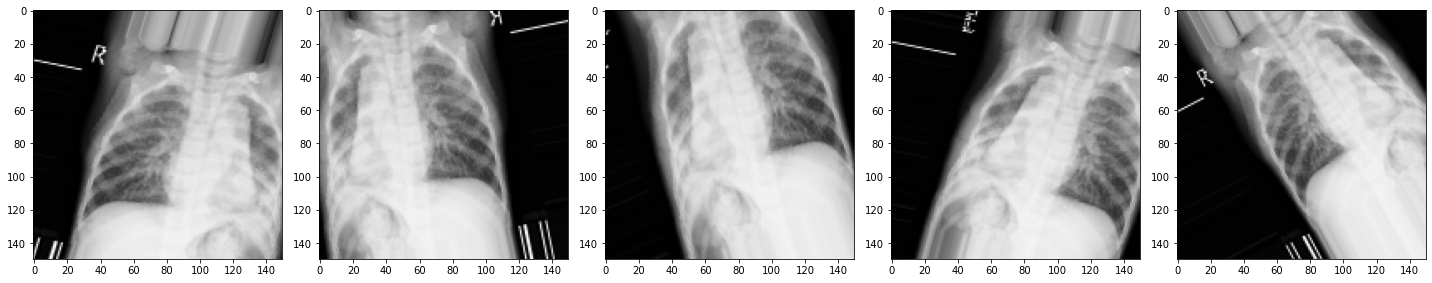

In [11]:
imag_to_print(images)

In [12]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten

In [13]:
model=Sequential([
    Conv2D(filters=32,kernel_size=(3,3),input_shape=[150, 150, 3]),
    MaxPool2D((2,2)),
    Conv2D(filters=64,kernel_size=(3,3)),
    MaxPool2D(2,2),
    Dropout(0.25),
    
    Flatten(),
    Dense(units=1024,activation='relu'),
    Dropout(0.25),
    Dense(units=512,activation='relu'),
    Dense(units=256,activation='relu'),
    Dense(units=64,activation='relu'),
    Dropout(0.5),
    Dense(units=2,activation='softmax')
    
    
    
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 36, 36, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 82944)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              8

In [15]:
from tensorflow.keras.optimizers import Adam

In [16]:
model.compile(optimizer=Adam(lr=0.0001),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [17]:
history=model.fit(training_dataset,epochs=10,validation_data=valid_dataset,verbose=1)

Epoch 1/10
163/163 [==============================] - 418s 3s/step - loss: 0.6507 - accuracy: 0.7151 - val_loss: 0.4890 - val_accuracy: 0.7901
Epoch 2/10
163/163 [==============================] - 475s 3s/step - loss: 0.4335 - accuracy: 0.7980 - val_loss: 0.3845 - val_accuracy: 0.8301
Epoch 3/10
163/163 [==============================] - 506s 3s/step - loss: 0.3924 - accuracy: 0.8226 - val_loss: 0.3582 - val_accuracy: 0.8494
Epoch 4/10
163/163 [==============================] - 472s 3s/step - loss: 0.2922 - accuracy: 0.8706 - val_loss: 0.4074 - val_accuracy: 0.8061
Epoch 5/10
163/163 [==============================] - 333s 2s/step - loss: 0.2875 - accuracy: 0.8796 - val_loss: 0.3608 - val_accuracy: 0.8478
Epoch 6/10
163/163 [==============================] - 323s 2s/step - loss: 0.2690 - accuracy: 0.8898 - val_loss: 0.2927 - val_accuracy: 0.8750
Epoch 7/10
163/163 [==============================] - 318s 2s/step - loss: 0.2869 - accuracy: 0.8819 - val_loss: 0.4169 - val_accuracy: 0.8542

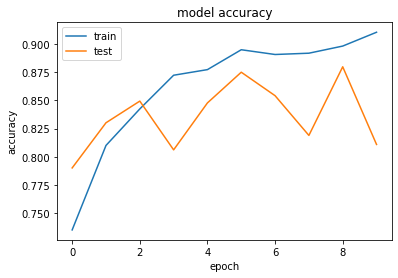

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

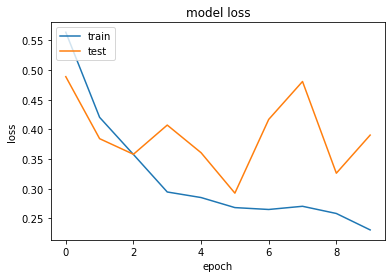

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
model.save("Own_CNN_model.h5")